--------------------------------------------------
ANALYSIS: IMPACT OF HEALTH SPENDING ON LIFE EXPECTANCY
R2 Score (Success Rate): 0.4143
Mean Squared Error: 45.1832
--------------------------------------------------


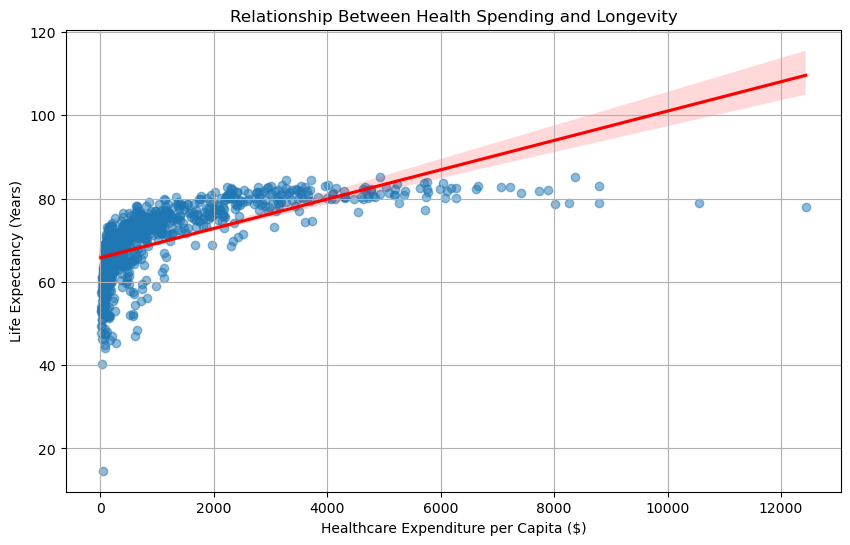

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Verileri Yükle
try:
    happiness = pd.read_csv(r"C:\Users\blgnd\OneDrive\Masaüstü\gdp-vs-happiness.csv")
    expenditure = pd.read_csv(r"C:\Users\blgnd\OneDrive\Masaüstü\annual-healthcare-expenditure-per-capita.csv")
    life_expectancy = pd.read_csv(r"C:\Users\blgnd\OneDrive\Masaüstü\life-expectancy.csv")
    
    # Sütun isimlerini temizle
    for df_temp in [happiness, expenditure, life_expectancy]:
        df_temp.columns = df_temp.columns.str.strip()

    # 2. Verileri Birleştir
    df = expenditure.merge(life_expectancy, on=['Entity', 'Code', 'Year'])

    # 3. Sütunları Otomatik Bul (Hata almamak için anahtar kelime kullanıyoruz)
    # Hedef (y): Yaşam Ömrü (içinde 'expectancy' geçen sütun)
    target_col = [c for c in df.columns if 'expectancy' in c.lower()][0]
    # Özellik (X): Sağlık Harcaması (içinde 'expenditure' geçen sütun)
    feature_col = [c for c in df.columns if 'expenditure' in c.lower()][0]

    # Boş verileri temizle
    df_final = df.dropna(subset=[target_col, feature_col])

    X = df_final[[feature_col]]
    y = df_final[target_col]

    # 4. Eğitim ve Test Ayrımı
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 5. Modeli Kur ve Eğit
    model_life = LinearRegression()
    model_life.fit(X_train, y_train)
    y_pred = model_life.predict(X_test)

    # 6. İngilizce Sonuçları Yazdır
    print("-" * 50)
    print("ANALYSIS: IMPACT OF HEALTH SPENDING ON LIFE EXPECTANCY")
    print(f"R2 Score (Success Rate): {r2_score(y_test, y_pred):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
    print("-" * 50)

    # 7. Görselleştirme (Regresyon Grafiği)
    plt.figure(figsize=(10,6))
    sns.regplot(x=X_test, y=y_test, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.xlabel('Healthcare Expenditure per Capita ($)')
    plt.ylabel('Life Expectancy (Years)')
    plt.title('Relationship Between Health Spending and Longevity')
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Error: {e}")